In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

In [2]:
dta= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crop prediction/crop_dataset2.csv')
dta.head()

,Crop,N (mg/kg),P (mg/kg),K (mg/kg),pH,EC(uS/cm),MOISTURE (%)
0,Cassava,150,50,100,5.5,1.5,60
1,Cassava,150,50,100,5.5,1.5,63
2,Cassava,150,50,100,5.5,1.5,66
3,Cassava,150,50,100,5.5,1.5,69
4,Cassava,150,50,100,5.5,1.5,72


In [3]:
dta.isnull().sum()

Crop            0
N (mg/kg)       0
P (mg/kg)       0
K (mg/kg)       0
pH              0
EC(uS/cm)       0
MOISTURE (%)    0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder


In [5]:
label_encoder = LabelEncoder()
dta['Crop'] = label_encoder.fit_transform(dta['Crop'])

In [6]:
dta.head()

,Crop,N (mg/kg),P (mg/kg),K (mg/kg),pH,EC(uS/cm),MOISTURE (%)
0,1,150,50,100,5.5,1.5,60
1,1,150,50,100,5.5,1.5,63
2,1,150,50,100,5.5,1.5,66
3,1,150,50,100,5.5,1.5,69
4,1,150,50,100,5.5,1.5,72


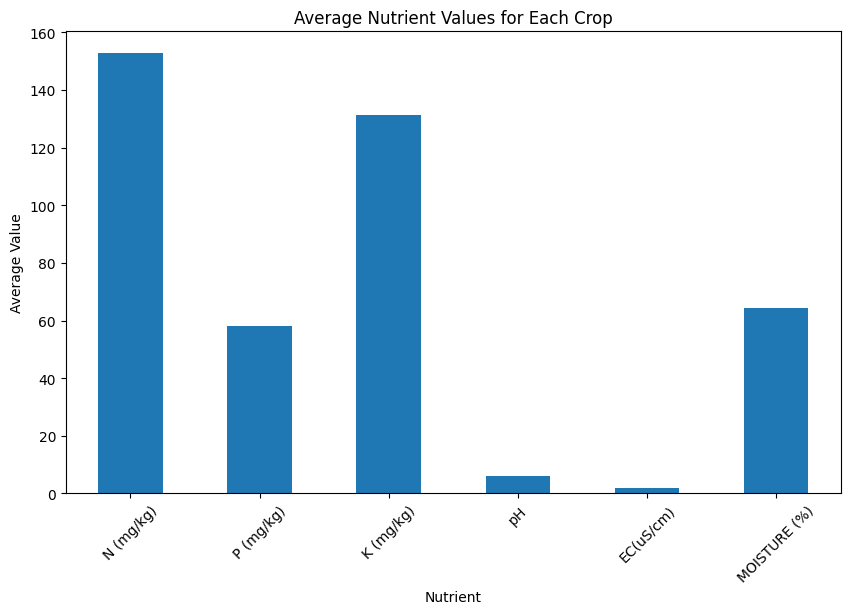

In [8]:
avg_nutrient_values = dta.drop('Crop', axis=1).mean()
plt.figure(figsize=(10, 6))
avg_nutrient_values.plot(kind='bar')
plt.title('Average Nutrient Values for Each Crop')
plt.xlabel('Nutrient')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

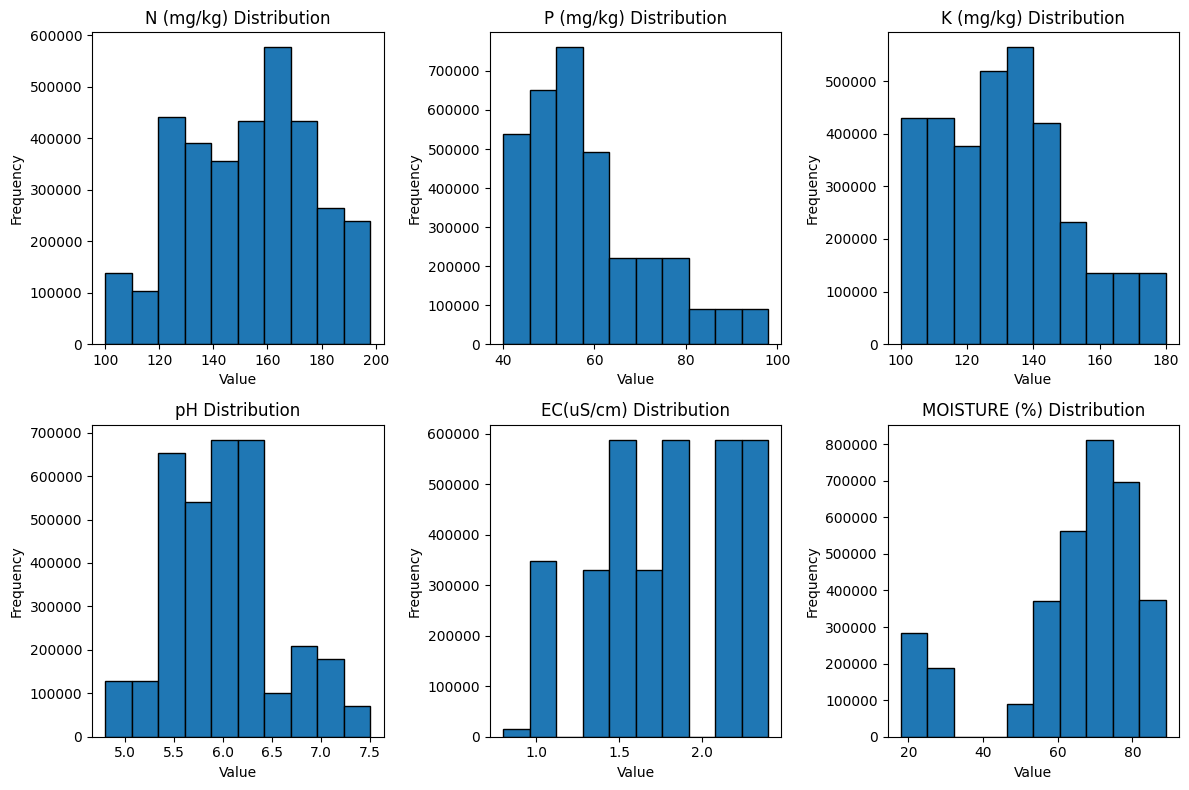

In [9]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(dta.columns[1:]):
    if i < 6:
        plt.subplot(2, 3, i+1)
        plt.hist(dta[column], bins=10, edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


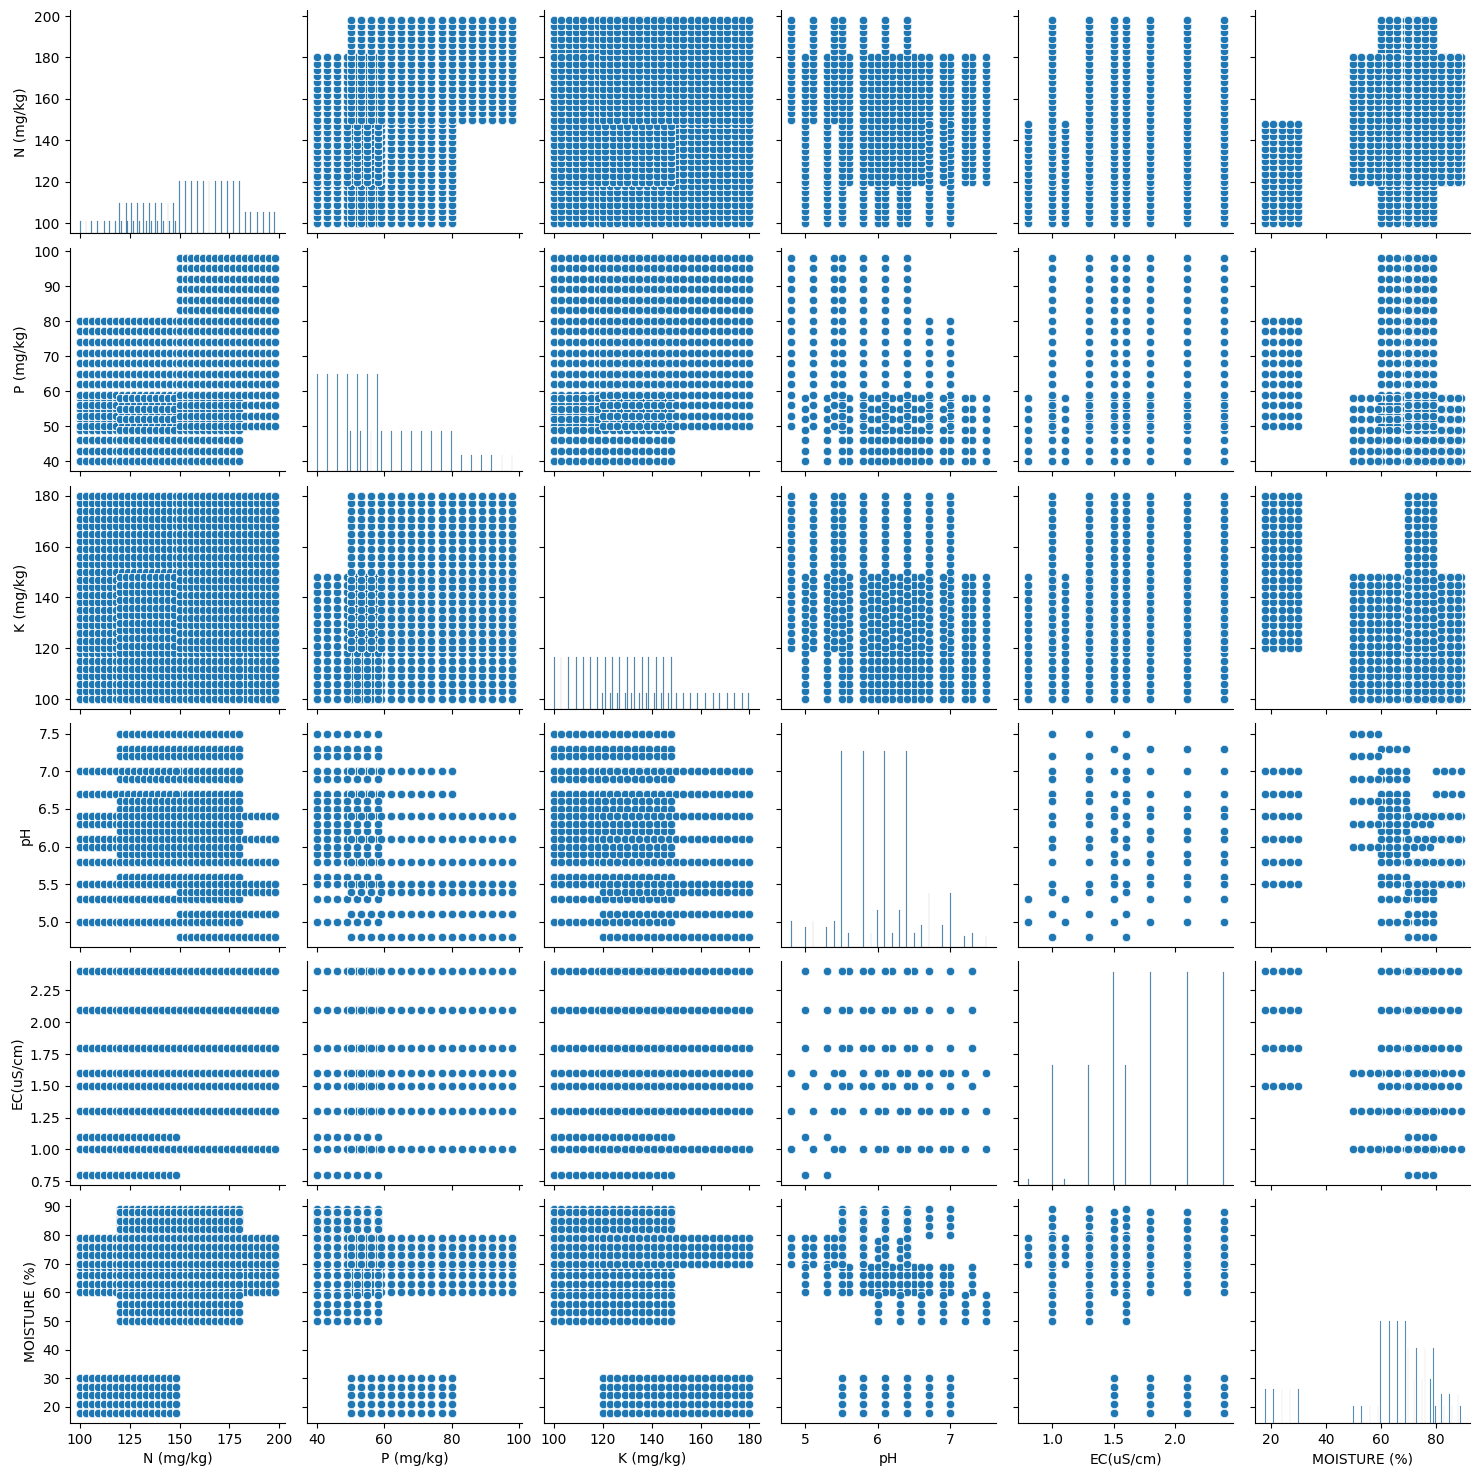

In [10]:
sns.pairplot(dta.drop('Crop', axis=1))
plt.show()

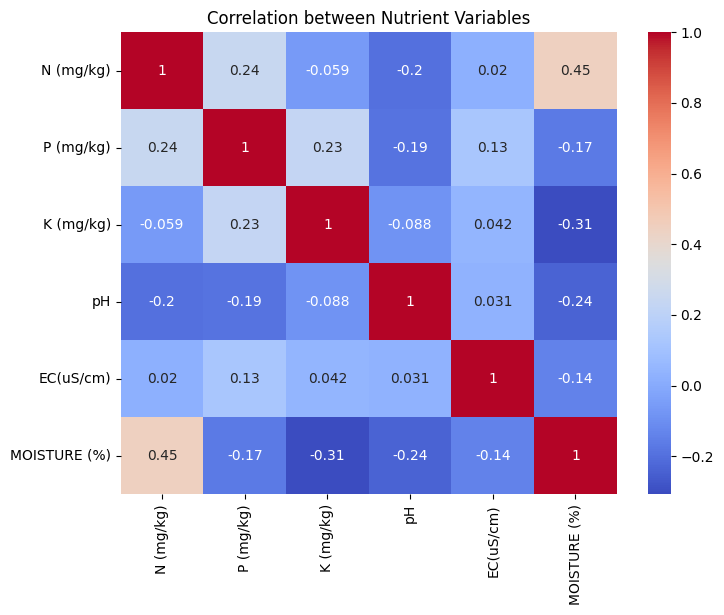

In [11]:
corr_matrix = dta.drop('Crop', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Nutrient Variables')
plt.show()

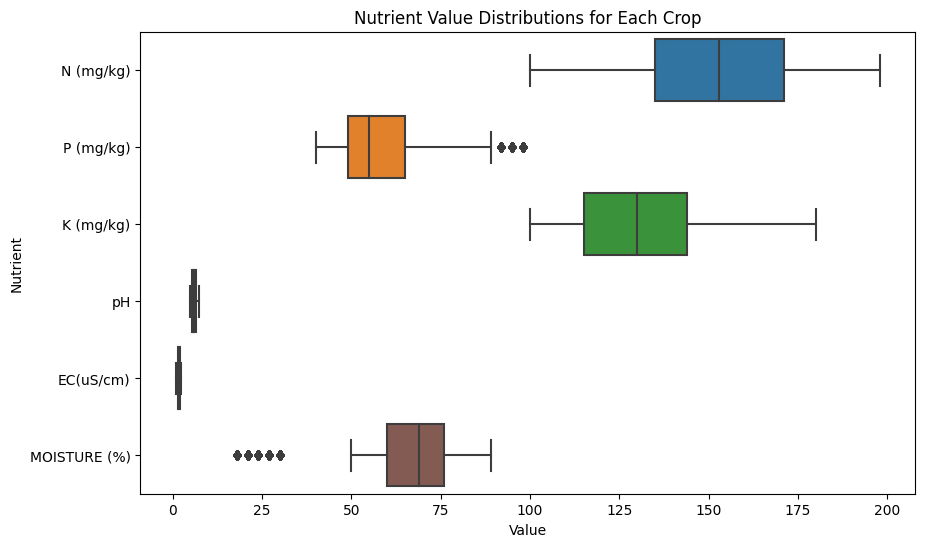

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dta.drop('Crop', axis=1), orient='h')
plt.title('Nutrient Value Distributions for Each Crop')
plt.xlabel('Value')
plt.ylabel('Nutrient')
plt.show()

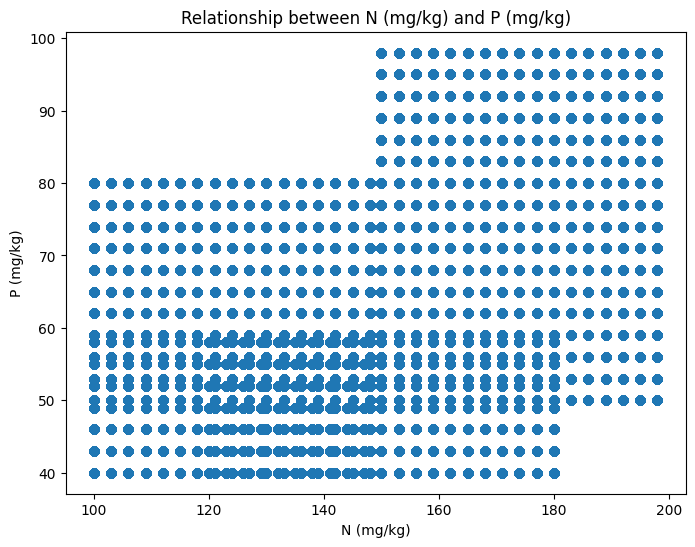

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(dta['N (mg/kg)'], dta['P (mg/kg)'])
plt.title('Relationship between N (mg/kg) and P (mg/kg)')
plt.xlabel('N (mg/kg)')
plt.ylabel('P (mg/kg)')
plt.show()

In [14]:
X = dta.drop('Crop', axis=1)
y = dta['Crop']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
rf = RandomForestClassifier(random_state=42)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

In [21]:
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 84.09%
